## Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

# Challenge 1
## Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [106]:
def roll_dice(n:int)-> pd.DataFrame :
    'This function simulates rolling a dice "n" times and stores the results in a pd.DataFrame'
    
    dice = list(np.arange(1,7))
    simulation = [np.random.choice(dice, replace=True) for i in range(n) ]
    simulation_df = pd.DataFrame(simulation, columns=['dice_result'])

    return simulation_df

In [109]:
dice_sim = roll_dice(10)
dice_sim

,dice_result
0,6
1,2
2,5
3,4
4,6
5,6
6,3
7,2
8,3
9,2


## Plot the results sorted by value.

In [112]:
sorted_sim = dice_sim.sort_values(by='dice_result')
sorted_sim

,dice_result
1,2
7,2
9,2
6,3
8,3
3,4
2,5
0,6
4,6
5,6


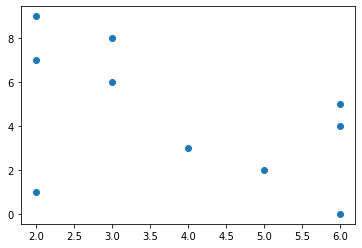

In [113]:
plt.scatter(x=sorted_sim, y=sorted_sim.index)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([3., 0., 2., 0., 0., 1., 0., 1., 0., 3.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <a list of 10 Patch objects>)

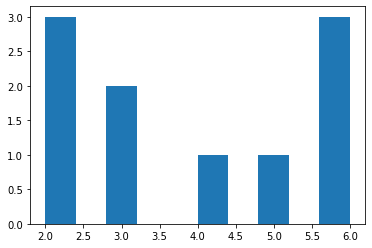

In [136]:
# histogram of dice_sim:

plt.hist(x=dice_sim.dice_result)

In [155]:
dice_sim.dice_result.value_counts()

6    3
2    3
3    2
5    1
4    1
Name: dice_result, dtype: int64

# Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

## Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [146]:
# your code here
def a_mean(values : list) -> float:
    'This function calculates the arithmetic mean of a given list of values.'
    
    return np.sum(values)/len(values)

## 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [162]:
# your code
dice_sim.dice_result.value_counts()

6    3
2    3
3    2
5    1
4    1
Name: dice_result, dtype: int64

In [161]:
a_mean(dice_sim.dice_result.value_counts())

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [195]:
# your code here
def my_median (values: list):
    
    '''
    This function receives a list of numbers and returns its median value.
    '''
    
    values.sort()
    
    if len(values)%2==0:
        med1 = values[int(len(values)/2)]
        med2 = values[int((len(values)-1)/2)]
        return (med1 + med2)/2
        
    elif len(values)%2 != 0:
        med = values[int(len(values)/2)]
        return med
    
    else:
        return 'You must enter a list of numeric values'

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [274]:
# your code here

def my_quartile(values: list) -> list :
    'This function receives a list of numbers and calculates the quartiles'
    
    values.sort()
    q2 = my_median(values)

    round(q2)    
    
    if len(values)%2 ==0 :
        q1_range = range(round(q2)+1)
        q3_range = range(-(round(q2)+1),0)

    elif len(values)%2 !=0 :
        q1_range = range(round(q2))        
        q3_range = range(-(round(q2)),0)        
    
    q1_values = [values[q1] for q1 in q1_range]
    q1 = my_median(q1_values)
    q3_values = [values[q3] for q3 in q3_range]
    q3 = my_median(q3_values)

    return [q1, q2, q3]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [278]:
# your code here
dice_100 = pd.read_csv('data/roll_the_dice_hundred.csv')
dice_100 = dice_100.drop('Unnamed: 0', axis=1)
dice_100

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


In [282]:
dice_sort = dice_100.sort_values(by='value')

In [283]:
dice_sort

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


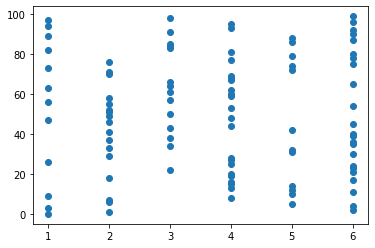

In [297]:
plt.scatter(x=dice_sort.value, y=dice_sort.roll)

In [0]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [293]:
# your code here
a_mean(list(dice_sort.value))

3.74

#### 3.- Now, calculate the frequency distribution.


In [295]:
# your code here
dice_sort.value.value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

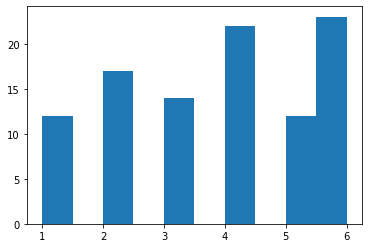

In [296]:
# your code here
plt.hist(dice_sort.value)

In [0]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [301]:
# your code here
dice_1000 = pd.read_csv('data/roll_the_dice_thousand.csv')
dice_1000 = dice_1000.drop('Unnamed: 0', axis=1)
dice_1000

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4
998,998,3


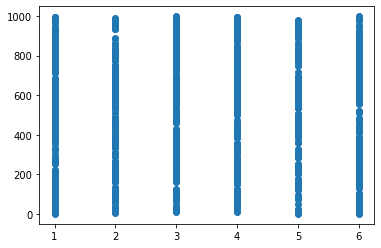

In [303]:
plt.scatter(x=dice_1000.value, y=dice_1000.roll)

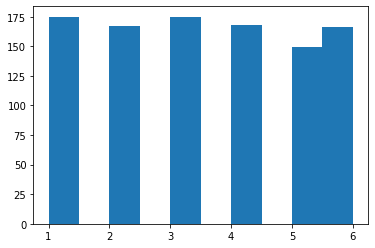

In [305]:
plt.hist(dice_1000.value);

In [0]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [309]:
# your code here
ages = pd.read_csv('data/ages_population.csv')
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


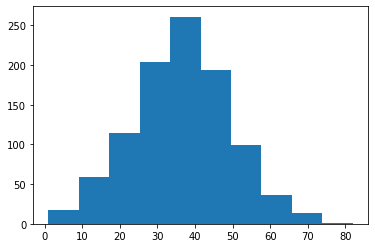

In [310]:
plt.hist(ages.observation);

In [311]:
# the mean is probably around 35 - 40
# standard deviation around 25 - 50

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [312]:
# your code here
ages.observation.mean()

36.56

In [313]:
ages.observation.std()

12.81649962597677

In [0]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [314]:
# your code here
ages2 = pd.read_csv('data/ages_population2.csv')

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

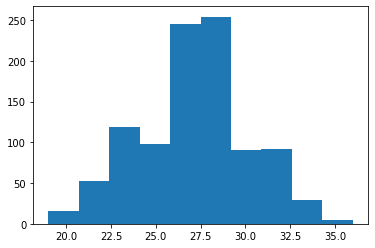

In [318]:
plt.hist(ages2.observation)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [0]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [324]:
# your code here for ages
print (f' mean = {ages.observation.mean()}, std = {ages.observation.std()}')

 mean = 36.56, std = 12.81649962597677


In [325]:
# your code here for ages2
print (f' mean = {ages2.observation.mean()}, std = {ages2.observation.std()}')

 mean = 27.155, std = 2.9698139326891835


In [0]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [326]:
# your code here
ages3 = pd.read_csv('data/ages_population3.csv')

In [327]:
ages3.observation.value_counts()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

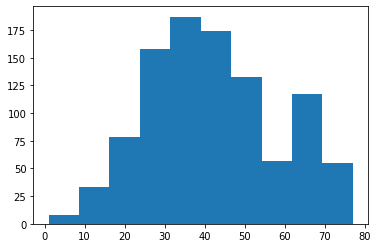

In [329]:
plt.hist(ages3.observation);

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [330]:
# your code here for ages
print (f' mean = {ages3.observation.mean()}, std = {ages3.observation.std()}')

 mean = 41.989, std = 16.14470595986593


In [0]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [333]:
# your code here
my_quartile(list(ages3.observation))

[14.0, 40.0, 72.0]

In [0]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [334]:
# your code here
print(my_quartile(list(ages.observation)))
print(my_quartile(list(ages2.observation)))

[10.0, 37.0, 63.5]
[20.0, 27.0, 33.0]


In [0]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [0]:
# your code here


In [0]:
"""
your comments here
"""